# IPL Data Analysis and Visualization (2008-2020)

## Importing required libraries (pandas, numpy, seaborn, matplotlib)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Preparation - reading data from the csv file 

In [2]:
ipl_df = pd.read_csv('IPL Matches 2008-2020.csv')

In [3]:
# checking the type of values in the df
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [4]:
# using shape to see (rows, columns)
ipl_df.shape

(816, 17)

In [5]:
#getting a brief overview of the dataframe
ipl_df.describe

<bound method NDFrame.describe of           id        city        date player_of_match  \
0     335982   Bangalore  2008-04-18     BB McCullum   
1     335983  Chandigarh  2008-04-19      MEK Hussey   
2     335984       Delhi  2008-04-19     MF Maharoof   
3     335985      Mumbai  2008-04-20      MV Boucher   
4     335986     Kolkata  2008-04-20       DJ Hussey   
..       ...         ...         ...             ...   
811  1216547       Dubai  2020-09-28  AB de Villiers   
812  1237177       Dubai  2020-11-05       JJ Bumrah   
813  1237178   Abu Dhabi  2020-11-06   KS Williamson   
814  1237180   Abu Dhabi  2020-11-08      MP Stoinis   
815  1237181       Dubai  2020-11-10        TA Boult   

                                          venue  neutral_venue  \
0                         M Chinnaswamy Stadium              0   
1    Punjab Cricket Association Stadium, Mohali              0   
2                              Feroz Shah Kotla              0   
3                            

## Data Processing and Cleaning - removing nan values (if any) and renaming & removing columns to aid better analysis

In [6]:
ipl_df.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


#### Removing neutral venue, method,id, and eliminator columns 

In [7]:
ipl_df.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [8]:
ipl_df.drop(columns=['neutral_venue', 'method', 'eliminator', 'id'], inplace=True)

In [9]:
ipl_df

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Nitin Menon,PR Reiffel
812,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,CB Gaffaney,Nitin Menon
813,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,PR Reiffel,S Ravi
814,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,PR Reiffel,S Ravi


#### Adding new column 'Season' to split the matches based on the year played

In [10]:
#convert and store the dates in a list
date_list = list(ipl_df['date'])

list_of_years = []

#get the first four places(year) and store in the list
for i in date_list:
    list_of_years.append(i[:4])

In [11]:
#the list that will be added to the new column
seasons = []

for i in list_of_years:
    seasons.append('IPL-' +i)

In [12]:
#method to add the column at a specific position
ipl_df.insert(loc=0, column='Seasons', value = seasons)

In [13]:
ipl_df.head()

,Seasons,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,IPL-2008,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,IPL-2008,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,IPL-2008,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,Aleem Dar,GA Pratapkumar
3,IPL-2008,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,IPL-2008,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan


In [14]:
#list of unique seasons
ipl_df.Seasons.unique()

array(['IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011', 'IPL-2012',
       'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016', 'IPL-2017',
       'IPL-2018', 'IPL-2019', 'IPL-2020'], dtype=object)

In [53]:
#list of unique cities
city_list = ipl_df.city.unique()

In [54]:
len(city_list)

31

In [16]:
#list of unique teams
ipl_df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

#### Renaming the team columns

- Pune has been represented by three separate franchise names over the years (Rising Pune Supergiants, Rising Pune Supergiant, Pune Warriors). Therefore, the value will now be replaced by Rising Pune Supergiants
- Delhi has been represented by two separate franchise names over the years (Delhi Daredevils -> Delhi Capitals)

In [17]:
ipl_df.team1.replace({'Rising Pune Supergiant': 'Rising Pune Supergiants', 'Pune Warriors': 'Rising Pune Supergiants', 'Delhi Daredevils':'Delhi Capitals'}, inplace=True)
ipl_df.team2.replace({'Rising Pune Supergiant': 'Rising Pune Supergiants', 'Pune Warriors': 'Rising Pune Supergiants', 'Delhi Daredevils':'Delhi Capitals'}, inplace=True)

ipl_df.toss_winner.replace({'Rising Pune Supergiant': 'Rising Pune Supergiants', 'Pune Warriors': 'Rising Pune Supergiants', 'Delhi Daredevils':'Delhi Capitals'}, inplace=True)
ipl_df.winner.replace({'Rising Pune Supergiant': 'Rising Pune Supergiants', 'Pune Warriors': 'Rising Pune Supergiants', 'Delhi Daredevils':'Delhi Capitals'}, inplace=True)

#changing city name of Bangalore to Bengaluru after it was renamed
ipl_df.city.replace('Bangalore', 'Bengaluru', inplace=True)

In [18]:
ipl_df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants', 'Sunrisers Hyderabad', 'Gujarat Lions'],
      dtype=object)

In [19]:
ipl_df.head()

,Seasons,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,IPL-2008,Bengaluru,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,IPL-2008,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,IPL-2008,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,Aleem Dar,GA Pratapkumar
3,IPL-2008,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,IPL-2008,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan


#### Checking for NaN values and cleaning them

In [20]:
ipl_df.isna().sum().sum()

42

In [21]:
#dataframe to see all the rows that have null values
null_df = ipl_df[ipl_df.isna().any(axis=1)]
null_df

,Seasons,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
66,IPL-2009,Cape Town,2009-04-23,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,MR Benson,M Erasmus
130,IPL-2010,Chennai,2010-03-21,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,K Hariharan,DJ Harper
241,IPL-2011,Delhi,2011-05-21,NaN,Feroz Shah Kotla,Delhi Capitals,Rising Pune Supergiants,Delhi Capitals,bat,NaN,NaN,NaN,SS Hazare,RJ Tucker
328,IPL-2013,Hyderabad,2013-04-07,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,AK Chaudhary,S Ravi
341,IPL-2013,Bengaluru,2013-04-16,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,M Erasmus,VA Kulkarni
399,IPL-2014,NaN,2014-04-17,YS Chahal,Sharjah Cricket Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,Aleem Dar,S Ravi
402,IPL-2014,NaN,2014-04-19,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,Aleem Dar,AK Chaudhary
403,IPL-2014,NaN,2014-04-19,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,Delhi Capitals,wickets,4.0,Aleem Dar,VA Kulkarni
404,IPL-2014,NaN,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,BF Bowden,M Erasmus
406,IPL-2014,NaN,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,M Erasmus,S Ravi


#### Additionally, 'city' column has NaN values but the stadium info (Dubai International Cricket Stadium/Sharjah Cricket Stadium)  has been provided. Therefore, city can be renamed to Dubai. 

#### The values start from index 399 and go on till 417. Therefore, we can filter the ipl_df further, get those NaN values and replace with 'Dubai'.

In [22]:
#accessing the specific index with loc and renaming the city
ipl_df.loc[[399, 402, 403, 404, 406, 407, 408, 409, 410, 413, 414, 415, 417], 'city'] = 'Dubai'

In [23]:
ipl_df.loc[398:420]

,Seasons,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
398,IPL-2014,Abu Dhabi,2014-04-16,JH Kallis,Sheikh Zayed Stadium,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,41.0,M Erasmus,RK Illingworth
399,IPL-2014,Dubai,2014-04-17,YS Chahal,Sharjah Cricket Stadium,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,Aleem Dar,S Ravi
400,IPL-2014,Abu Dhabi,2014-04-18,GJ Maxwell,Sheikh Zayed Stadium,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Kings XI Punjab,wickets,6.0,RK Illingworth,C Shamshuddin
401,IPL-2014,Abu Dhabi,2014-04-18,AM Rahane,Sheikh Zayed Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,BF Bowden,RK Illingworth
402,IPL-2014,Dubai,2014-04-19,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,Aleem Dar,AK Chaudhary
403,IPL-2014,Dubai,2014-04-19,JP Duminy,Dubai International Cricket Stadium,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,Delhi Capitals,wickets,4.0,Aleem Dar,VA Kulkarni
404,IPL-2014,Dubai,2014-04-20,GJ Maxwell,Sharjah Cricket Stadium,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,wickets,7.0,BF Bowden,M Erasmus
405,IPL-2014,Abu Dhabi,2014-04-21,SK Raina,Sheikh Zayed Stadium,Chennai Super Kings,Delhi Capitals,Chennai Super Kings,bat,Chennai Super Kings,runs,93.0,RK Illingworth,C Shamshuddin
406,IPL-2014,Dubai,2014-04-22,GJ Maxwell,Sharjah Cricket Stadium,Kings XI Punjab,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Kings XI Punjab,runs,72.0,M Erasmus,S Ravi
407,IPL-2014,Dubai,2014-04-23,RA Jadeja,Dubai International Cricket Stadium,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,field,Chennai Super Kings,runs,7.0,HDPK Dharmasena,RK Illingworth


In [24]:
#check whether any other city values have NAN
ipl_df.city.isnull().any()

False

In [25]:
#check if any other columns have NaN
ipl_df.isna().any()[lambda x: x]

player_of_match    True
winner             True
result             True
result_margin      True
dtype: bool

#### By observation, it's clear that 'result margin' column has NaN values whenever the match has ended in a tie or didn't take place due to weather or technical issues.

In [26]:
#filling NaN values in 'result' column with 'No Result'
ipl_df['result'].fillna('No Result', inplace=True)

#filling NaN values in 'winner' with 'shared points'
ipl_df['winner'].fillna('Shared Points', inplace=True)

# change victory margin to 0 if match was a tie or a no result
ipl_df['result_margin'].fillna(float(0), inplace=True)

#change potm to nobody if match didn't have a result
ipl_df['player_of_match'].fillna('Nobody', inplace=True)

In [27]:
#to check for further NaN values
ipl_df.isna().sum().sum()

0

## Exploratory Analysis

### Questions to be answered:

1. _What was the most preferred decision after winning the toss - Choosing To Bat / Choosing To Field?_

2. _Which decision has proved most beneficial? - Fielding / Batting_

1. _Which venue has hosted the most number of IPL matches?_

1. _Who has been awarded with Player of the Match award the most number of times?_

1. _Which season had the most number of matches played and how many teams played in each season?_

1. _Which team had the highest win percentage during the period?_

1. _Which team won the IPL trophy the most number of times?_

#### Q1. What was the most preferred decision after winning the toss - Choosing To Bat / Choosing To Field?

In [28]:
ipl_df.head(5)

,Seasons,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
0,IPL-2008,Bengaluru,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,Asad Rauf,RE Koertzen
1,IPL-2008,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,MR Benson,SL Shastri
2,IPL-2008,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,Aleem Dar,GA Pratapkumar
3,IPL-2008,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,SJ Davis,DJ Harper
4,IPL-2008,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,K Hariharan


In [29]:
ipl_df['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [30]:
# Teams either choose to field first or bat first
toss_decisions_df = ipl_df.groupby('toss_decision')['city'].count().reset_index()
toss_decisions_df.rename(columns={'city' : 'total'}, inplace=True)
toss_decisions_df

,toss_decision,total
0,bat,320
1,field,496


#### Ans of 1 - The majority of the captains opted to field first after winning the toss.

#### Q2. Which decision has proved most beneficial? - Fielding / Batting

In [31]:
#create dataframes for (matches won by teams who won the toss and chose to field) & (matches won by teams who won the toss & chose to bat)

toss_field_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision']=='field'), ['toss_decision', 'winner']]

toss_bat_df = ipl_df.loc[(ipl_df['toss_winner'] == ipl_df['winner']) & (ipl_df['toss_decision'] == 'bat'), ['toss_decision', 'winner']]

In [32]:
# concat the two dataframes
frames = [toss_field_df, toss_bat_df]
result_toss_df = pd.concat(frames)
result_toss_df = result_toss_df.groupby('toss_decision').count().reset_index()
result_toss_df.rename(columns={'winner' : 'total'}, inplace=True)
result_toss_df

,toss_decision,total
0,bat,145
1,field,273


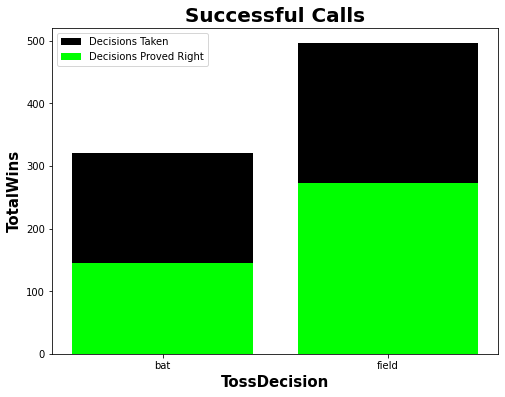

In [33]:
plt.figure(figsize=(8,6))
plt.title("Successful Calls",fontweight='bold',fontsize=20)
plt.xlabel('TossDecision',fontweight='bold',fontsize=15)
plt.ylabel('TotalWins',fontweight='bold',fontsize=15)
#plt.tick_params(labelsize=20)
plt.bar(toss_decisions_df.toss_decision, toss_decisions_df.total, color=['#000000', '#000000'])
plt.bar(result_toss_df.toss_decision, result_toss_df.total, color=['#00FF00','#00FF00'])
plt.legend(['Decisions Taken','Decisions Proved Right'])

#### Ans of 2 - Clearly, the decision to field first has been the better choice during the course of the seasons. Around 55% of the decisions to field first have resulted in a win.

#### Q3. Which venue has hosted the most number of IPL matches?

In [34]:
#number of venues
ipl_df.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [35]:
venue_df = ipl_df.groupby('venue')['date'].count().sort_values(ascending=False).reset_index()
venue_df.rename(columns={'date':'total_matches_played'}, inplace=True)
venue_df

,venue,total_matches_played
0,Eden Gardens,77
1,Feroz Shah Kotla,74
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,65
4,"Rajiv Gandhi International Stadium, Uppal",64
5,"MA Chidambaram Stadium, Chepauk",57
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

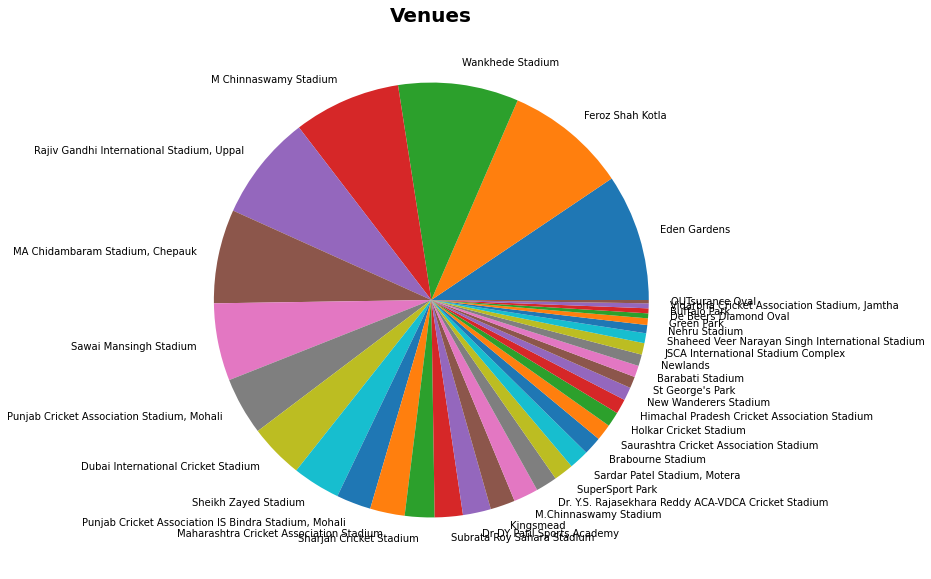

In [36]:
#convert venues to a list
venue_labels = list(venue_df.venue)

plt.figure(figsize=(10,10))
plt.title('Venues', fontweight='bold', fontsize=20)
#plt.tick_params(labelsize=30)
plt.pie(venue_df.total_matches_played, labels=venue_labels)
plt.plot

#### Ans of 3 - Eden Gardens hosted the highest number of games while Feroz Shah Kotla & Wankhede Stadium were a close 2nd and 3rd.

#### Q4. Who has been awarded with Player of the Match award the most number of times?

In [37]:
#check how many different players have won the PotM award.
potm = ipl_df.player_of_match.unique()
len(potm)

234

In [38]:
potm_df = ipl_df.groupby('player_of_match')['date'].count().sort_values(ascending=False).reset_index()
potm_df.rename(columns={'date':'times_won'}, inplace=True)
#store in a new dataframe with only 10 out of 234 values
new_potm_df = potm_df.head(10)

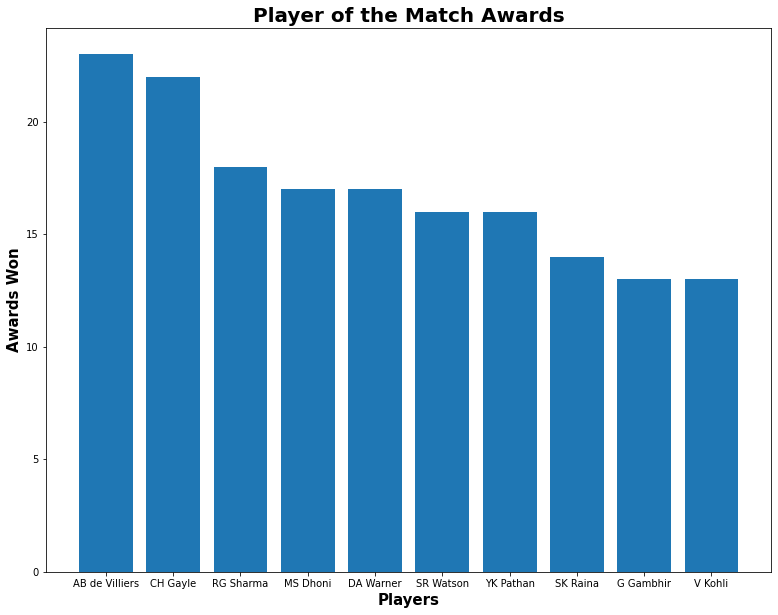

In [39]:
potms = new_potm_df.player_of_match
awards = new_potm_df.times_won
plt.figure(figsize=(13,10))
plt.title('Player of the Match Awards', fontweight='bold', fontsize=20)
plt.xlabel('Players', fontweight='bold', fontsize=15)
plt.ylabel('Awards Won', fontweight='bold', fontsize=15)
plt.bar(potms, awards)
plt.show()

#### Ans of 4 - AB de Villiers has won the most PotMs (23 times) while Chris Gayle is a close second with 22 awards.

#### Q5. Which season had the most number of matches played and how many teams played in each season?

In [40]:
seasons_df = ipl_df.groupby('Seasons')['date'].count().reset_index()
seasons_df.rename(columns={'date':'total_matches'}, inplace=True)
seasons_df

,Seasons,total_matches
0,IPL-2008,58
1,IPL-2009,57
2,IPL-2010,60
3,IPL-2011,73
4,IPL-2012,74
5,IPL-2013,76
6,IPL-2014,60
7,IPL-2015,59
8,IPL-2016,60
9,IPL-2017,59


In [41]:
#to count number of teams in each edition 
total_teams_df = ipl_df.groupby('Seasons')['team1'].unique()
team_count = []

for i in range(len(total_teams_df)):
    res = list(total_teams_df[i])
    team_count.append(len(res))
    

In [42]:
seasons_df['number_of_teams'] = team_count

In [43]:
seasons_df

,Seasons,total_matches,number_of_teams
0,IPL-2008,58,8
1,IPL-2009,57,7
2,IPL-2010,60,8
3,IPL-2011,73,10
4,IPL-2012,74,9
5,IPL-2013,76,9
6,IPL-2014,60,8
7,IPL-2015,59,8
8,IPL-2016,60,8
9,IPL-2017,59,8


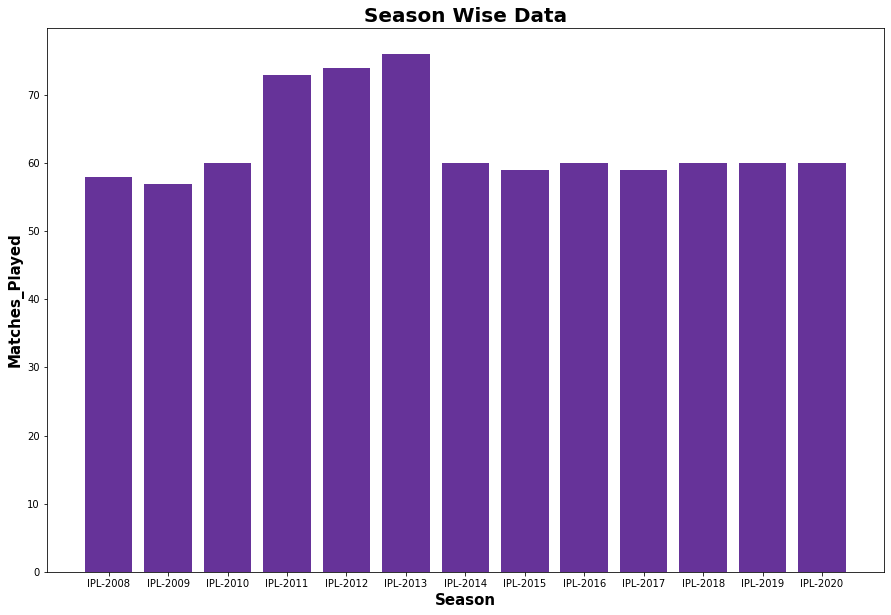

In [44]:
plt.figure(figsize=(15,10))
plt.title('Season Wise Data', fontweight='bold', fontsize=20)
plt.xlabel('Season', fontweight='bold', fontsize=15)
plt.ylabel('Matches_Played', fontweight='bold', fontsize=15)
plt.bar(seasons_df.Seasons, seasons_df.total_matches, color=['#663399'])
plt.show()

#### Ans of 5 - IPL 2012 had the highest number of games played due to the league having 10 teams at the time. Once the number of teams declined, the number of matches also stabilized around 60 games per season.

#### Q6. Which team had the highest number of wins during the period?

In [45]:
ipl_df.winner.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Delhi Capitals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kings XI Punjab', 'Deccan Chargers', 'Mumbai Indians',
       'Rising Pune Supergiants', 'Kochi Tuskers Kerala', 'Shared Points',
       'Sunrisers Hyderabad', 'Gujarat Lions'], dtype=object)

In [46]:
winner_df = ipl_df.groupby('winner')['date'].count().sort_values(ascending=False).reset_index()
winner_df.rename(columns={'date':'matches_won'}, inplace=True)

In [47]:
#drop shared points which indicate the match didn't have a result
winner_df = winner_df.drop(winner_df.index[12])
winner_df

,winner,matches_won
0,Mumbai Indians,120
1,Chennai Super Kings,106
2,Kolkata Knight Riders,99
3,Royal Challengers Bangalore,91
4,Kings XI Punjab,88
5,Delhi Capitals,86
6,Rajasthan Royals,81
7,Sunrisers Hyderabad,66
8,Deccan Chargers,29
9,Rising Pune Supergiants,27


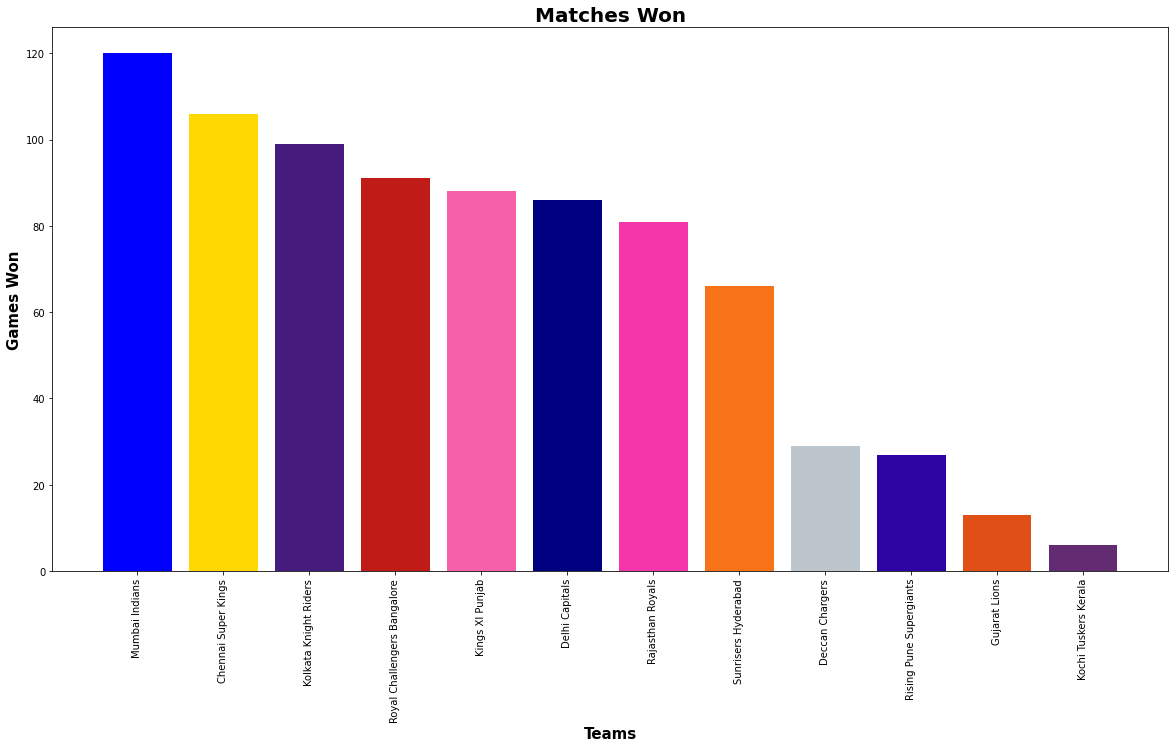

In [48]:
tickvalues = winner_df.index

plt.figure(figsize=(20, 10))
plt.title('Matches Won', fontweight='bold', fontsize=20)
plt.xlabel('Teams', fontweight='bold', fontsize=15)
plt.ylabel('Games Won', fontweight='bold', fontsize=15)
plt.xticks(ticks = tickvalues, labels = winner_df.winner, rotation='vertical')
plt.bar(winner_df.winner, winner_df.matches_won, color = ['blue','#FFD801','#461B7E','#C11B17','#F660AB','#000080','#F535AA','#F87217','#BCC6CC','#2C04A2','#E04F16','#632B72'])
plt.show()

#### Ans of 6 - Mumbai Indians has been the most successful franchise in the league with 120 wins in its kitty. Kochi Tuskers Kerala has only 6 wins as they played in just one season (IPL 2011).

#### Q7. Which team won the IPL trophy the most number of times?

In [49]:
#group by season and use tail function to get the result of the grand finals
title_winners_df = ipl_df.groupby('Seasons').tail(1)
title_winners_df

,Seasons,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2
57,IPL-2008,Mumbai,2008-06-01,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,BF Bowden,RE Koertzen
114,IPL-2009,Johannesburg,2009-05-24,A Kumble,New Wanderers Stadium,Royal Challengers Bangalore,Deccan Chargers,Royal Challengers Bangalore,field,Deccan Chargers,runs,6.0,RE Koertzen,SJA Taufel
174,IPL-2010,Mumbai,2010-04-25,SK Raina,Dr DY Patil Sports Academy,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Chennai Super Kings,runs,22.0,RE Koertzen,SJA Taufel
247,IPL-2011,Chennai,2011-05-28,M Vijay,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,Chennai Super Kings,runs,58.0,Asad Rauf,SJA Taufel
321,IPL-2012,Chennai,2012-05-27,MS Bisla,"MA Chidambaram Stadium, Chepauk",Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Kolkata Knight Riders,wickets,5.0,BF Bowden,SJA Taufel
397,IPL-2013,Kolkata,2013-05-26,KA Pollard,Eden Gardens,Chennai Super Kings,Mumbai Indians,Mumbai Indians,bat,Mumbai Indians,runs,23.0,HDPK Dharmasena,SJA Taufel
457,IPL-2014,Bengaluru,2014-06-01,MK Pandey,M Chinnaswamy Stadium,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,field,Kolkata Knight Riders,wickets,3.0,HDPK Dharmasena,BNJ Oxenford
516,IPL-2015,Kolkata,2015-05-24,RG Sharma,Eden Gardens,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Mumbai Indians,runs,41.0,HDPK Dharmasena,RK Illingworth
576,IPL-2016,Bengaluru,2016-05-29,BCJ Cutting,M Chinnaswamy Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,runs,8.0,HDPK Dharmasena,BNJ Oxenford
635,IPL-2017,Hyderabad,2017-05-21,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,Mumbai Indians,runs,1.0,NJ Llong,S Ravi


In [50]:
#teams that have won the league at least once
title_winners_df['winner'].unique()

array(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad'],
      dtype=object)

In [51]:
#number of times they've won the league
title_winners_df['winner'].value_counts()

Mumbai Indians           5
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

<AxesSubplot:title={'center':'Title Winners'}, xlabel='winner', ylabel='count'>

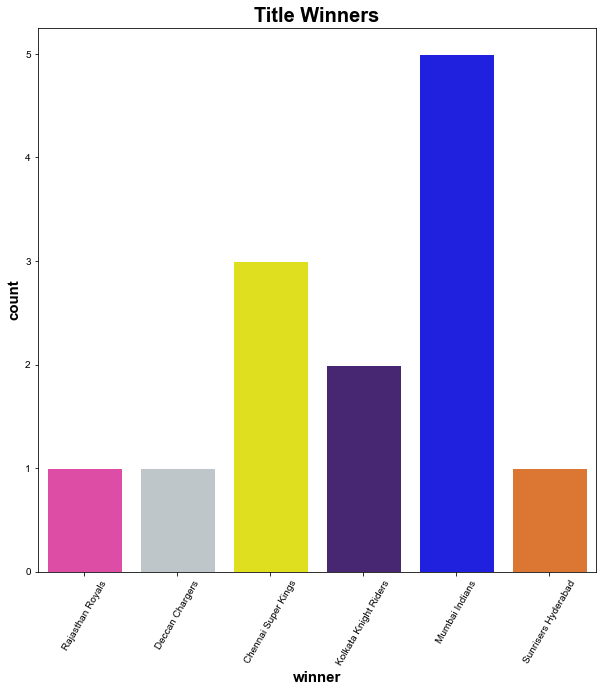

In [52]:
plt.figure(figsize=(10,10))
plt.title("Title Winners", fontweight='bold', fontsize=20)
plt.xlabel('Teams',fontweight='bold',fontsize=15)
plt.ylabel('Win Count',fontweight='bold',fontsize=15)
plt.xticks(rotation='60')
plt.tick_params(labelsize=10)
sns.set_theme(style="whitegrid")
sns.countplot(x=title_winners_df['winner'],palette=['#F535AA','#BCC6CC','yellow','#461B7E','blue','#F87217'])

#### Ans of 7 - Mumbai Indians has won the most titles (5) while CSK is in second place with 3 titles. Out of 11 franchises, only 6 have won the tournament at least once.

## Final inferences and conclusions

1. A total of 816 matches were played over the course of 13 seasons.
2. Out of 816, there were four matches that had no results and the points were shared between the teams.
3. As many as 31 cities have hosted IPL matches over the years.
4. IPL-2013 season had the most number of matches (76)
5. Mumbai Indians (MI) is the most successful team in the league with 120 wins. They are also the team with the highest number of titles (5).
6. AB de Villiers has won the Player of the Match award the most number of times (23).
7. Captains have opted to field first on majority of the occasions (496/816 times) and their teams has gone on to win in 273 of those occasions.